In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency
import seaborn as sns
import statistics
from fancyimpute import KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


In [2]:
#load the data
df = pd.read_csv('data.csv')

In [3]:
# Split the data into training and testing dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

In [4]:
# Loading the dataset which is in '.CSV' format i.e; (Comma-Seperated-Values)
train_actual = pd.read_csv("train_data.csv")
test_actual = pd.read_csv("test_data.csv")

In [5]:
train_data=train_actual.copy()
test_data=test_actual.copy()

In [6]:
#Let's exploring some observation of training dataset
train_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No
1,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
4,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [7]:
#few observation of test dataset
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
1,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
2,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7,No
3,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
4,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No


In [8]:
# Checking the dimension of dataset
print("Dimension of training dataset",train_data.shape)
print("Dimension of testing dataset",test_data.shape)

Dimension of training dataset (5634, 21)
Dimension of testing dataset (1409, 21)


In [9]:
# Checking the information about dataset
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [10]:
# Checking the descriptive statistics of the dataset
train_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5634.000000
mean,0.160809,32.373092,64.864253
std,0.367388,24.424539,30.089324
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.525000
75%,0.000000,55.000000,89.937500
max,1.000000,72.000000,118.600000


In [11]:
# Check columns of the dataset
train_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
#Extracting Unique values and Count using a for loop on the whole data

for i in train_data.columns:
    print(i, '->', len(train_data[i].value_counts()))

customerID -> 5634
gender -> 2
SeniorCitizen -> 2
Partner -> 2
Dependents -> 2
tenure -> 73
PhoneService -> 2
MultipleLines -> 3
InternetService -> 3
OnlineSecurity -> 3
OnlineBackup -> 3
DeviceProtection -> 3
TechSupport -> 3
StreamingTV -> 3
StreamingMovies -> 3
Contract -> 3
PaperlessBilling -> 2
PaymentMethod -> 4
MonthlyCharges -> 1495
TotalCharges -> 5300
Churn -> 2


In [13]:
# Now lest check the churn count and precentage rate in out dataset
print(train_data['Churn'].value_counts())
print('\n-------------------------------')

print(train_data['Churn'].value_counts(normalize=True))
print('\n--------------------------------')

Churn
No     4138
Yes    1496
Name: count, dtype: int64

-------------------------------
Churn
No     0.734469
Yes    0.265531
Name: proportion, dtype: float64

--------------------------------


In [14]:
# Missing value analysis check for Test Dataset
total = test_data.isnull().sum().sort_values(ascending=True)
percnt = (test_data.isnull().sum()/test_data.isnull().count()*100).sort_values(ascending=False)
miss_test_data = pd.concat([total,percnt], axis = 1, keys=['Total_miss_val_test','Percentage_test'])
miss_test_data

,Total_miss_val_test,Percentage_test
customerID,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
MultipleLines,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0


In [15]:
# Before we proceed furthur let's extract categorical variables 
cat_names = train_data.select_dtypes(exclude=np.number).columns.tolist()
#cat_names.append('area code')
cat_names

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [16]:
# Let's change the train test columns to categorical data types
train_data[cat_names] = train_data[cat_names].astype('category')
test_data[cat_names] = test_data[cat_names].astype('category')

Analyzing Data through visulization

Text(0, 0.5, 'Count')

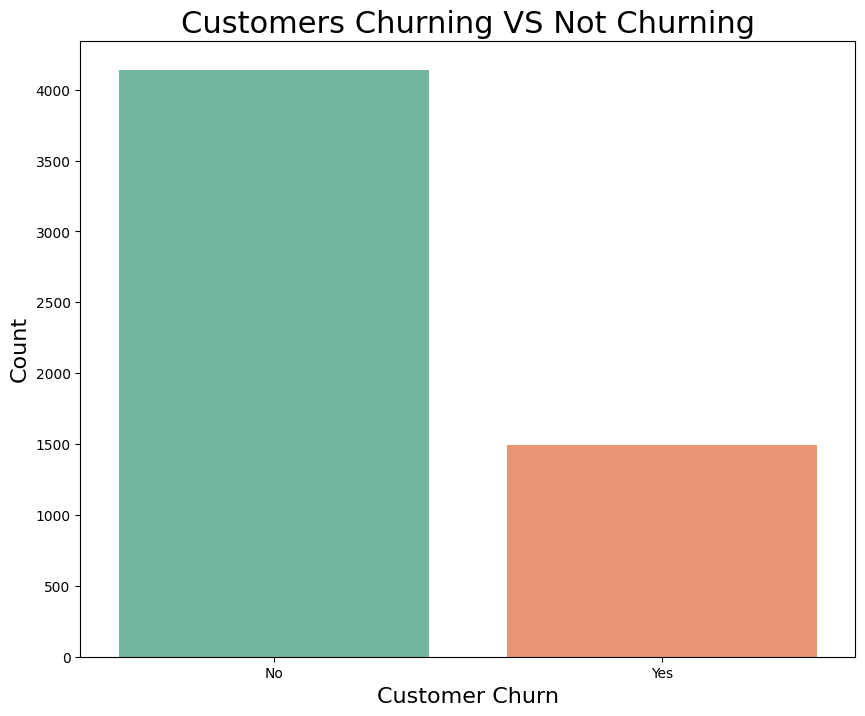

In [17]:
#Lets analyze the target variable churn
plt.figure(figsize=(10,8))
sns.countplot(x = train_data.Churn, palette='Set2')
plt.title('Customers Churning VS Not Churning', fontsize=22)
plt.xlabel('Customer Churn',fontsize=16)
plt.ylabel('Count',fontsize=16) 


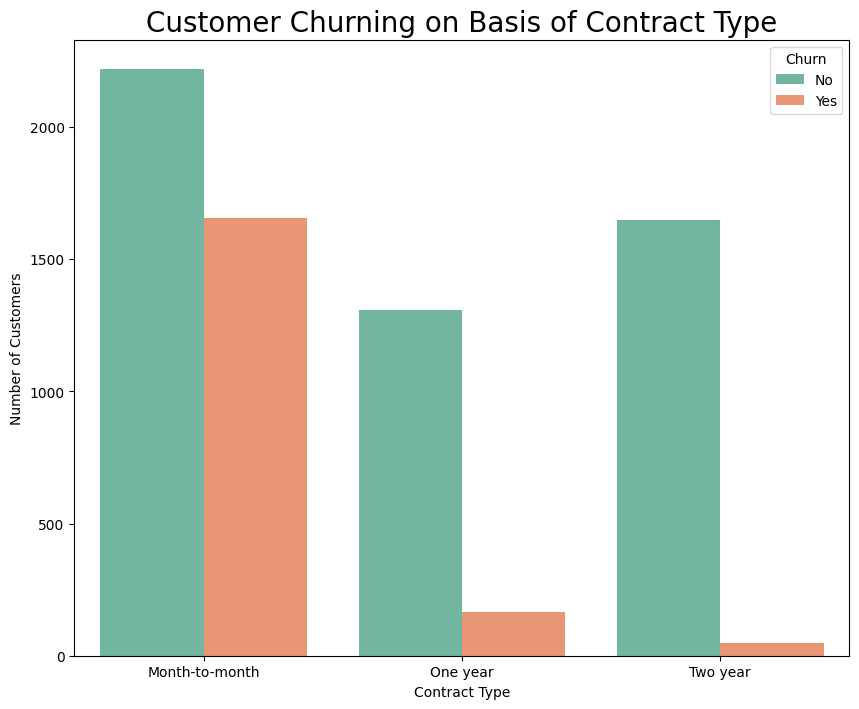

In [18]:
# Lets analyze the churn rate on the basis of contract type
plt.figure(figsize=(10, 8))
plt.title('Customer Churning on Basis of Contract Type', fontsize=20)
sns.countplot(x='Contract', hue='Churn', data=df, palette="Set2")
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()



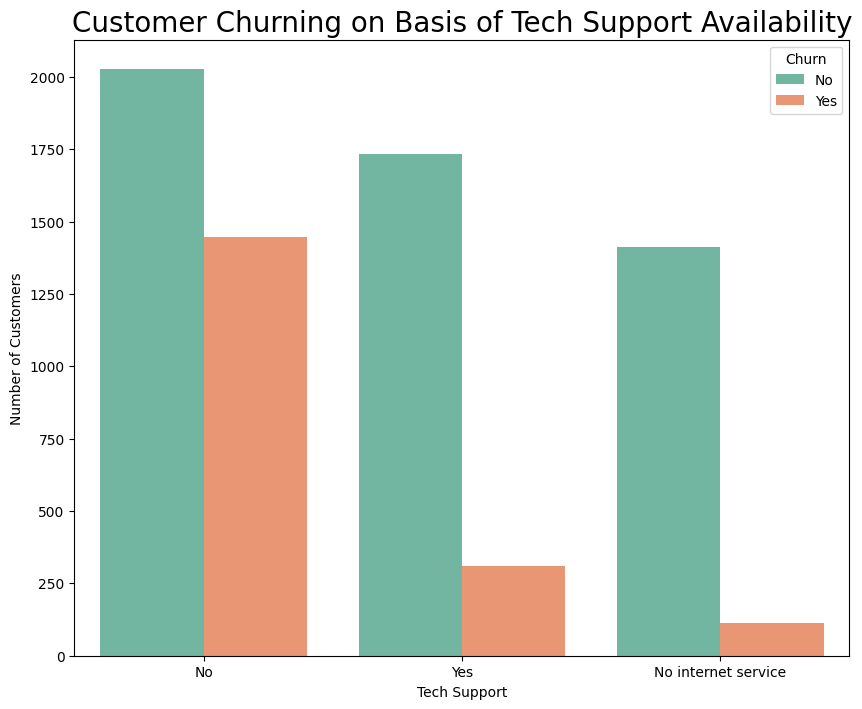

In [19]:
# Customer churning on the basis of tech support
plt.figure(figsize=(10, 8))
plt.title('Customer Churning on Basis of Tech Support Availability', fontsize=20)
sns.countplot(x='TechSupport', hue='Churn', data=df, palette="Set2")
plt.xlabel('Tech Support')
plt.ylabel('Number of Customers')
plt.show()

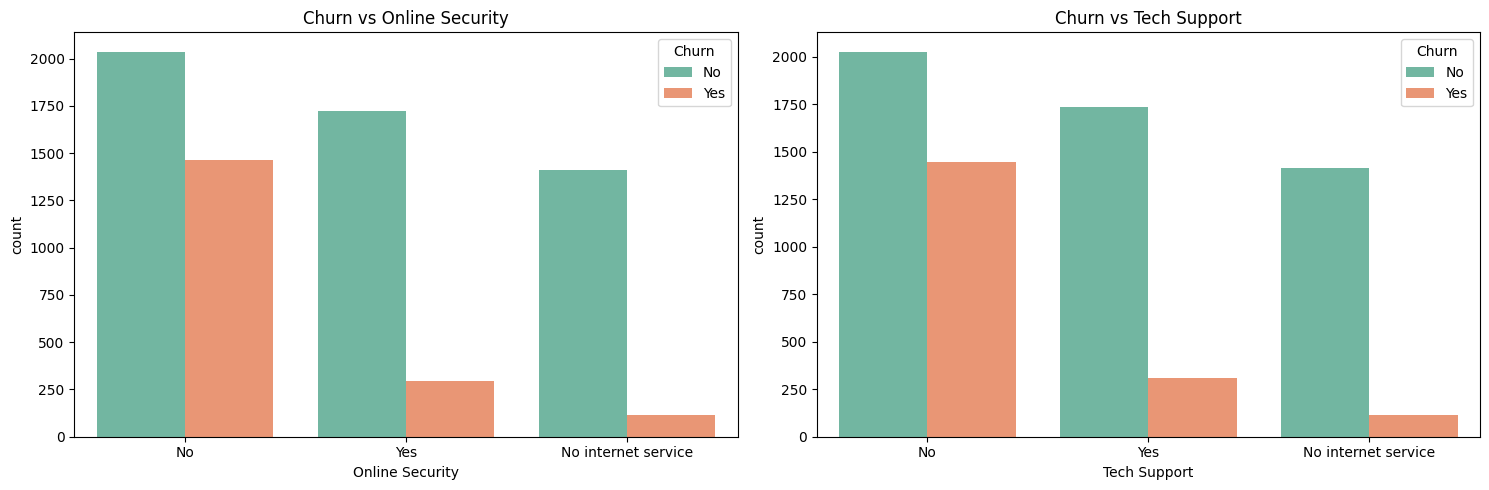

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Online Security vs Churn
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, ax=ax[0], palette="Set2")
ax[0].set_title('Churn vs Online Security')
ax[0].set_xlabel('Online Security')

# Tech Support vs Churn
sns.countplot(x='TechSupport', hue='Churn', data=df, ax=ax[1], palette="Set2")
ax[1].set_title('Churn vs Tech Support')
ax[1].set_xlabel('Tech Support')

plt.tight_layout()
plt.show()

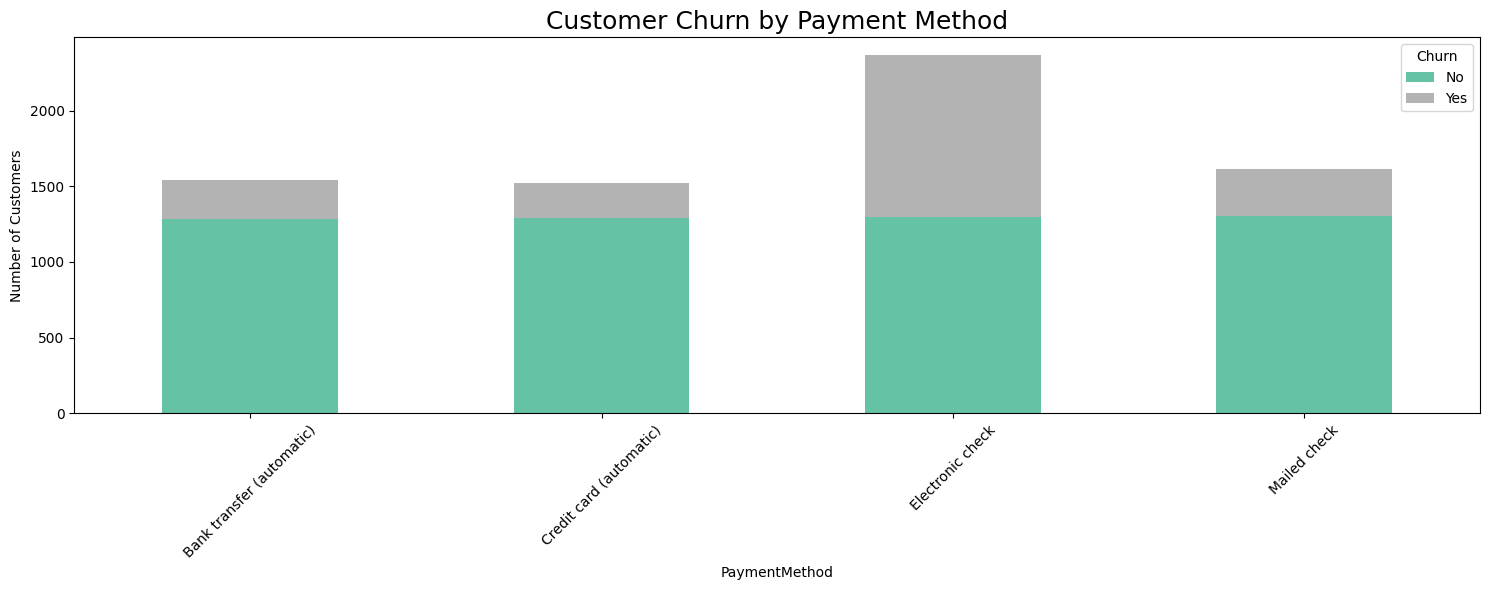

In [21]:
# Grouping by PaymentMethod and Churn
df.groupby(['PaymentMethod', 'Churn']).size().unstack().plot(
    kind='bar',
    stacked=True,
    figsize=(15, 6),
    colormap='Set2'
)

plt.title('Customer Churn by Payment Method', fontsize=18)
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


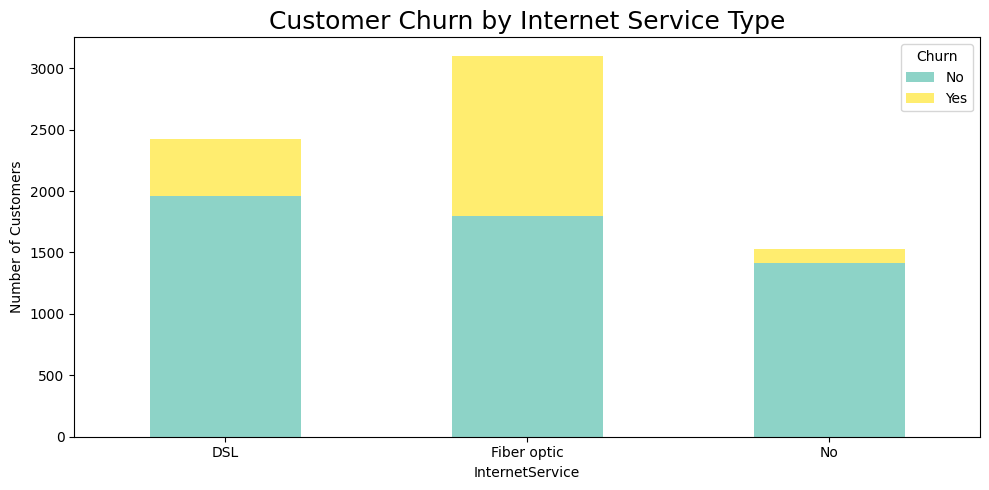

In [22]:
#Grouping by InternetService and Churn
df.groupby(['InternetService', 'Churn']).size().unstack().plot(
    kind='bar',
    stacked=True,
    figsize=(10, 5),
    colormap='Set3'
)

plt.title('Customer Churn by Internet Service Type', fontsize=18)
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [23]:
# Convert 'TotalCharges' to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows where TotalCharges is now NaN
df.dropna(subset=['TotalCharges'], inplace=True)

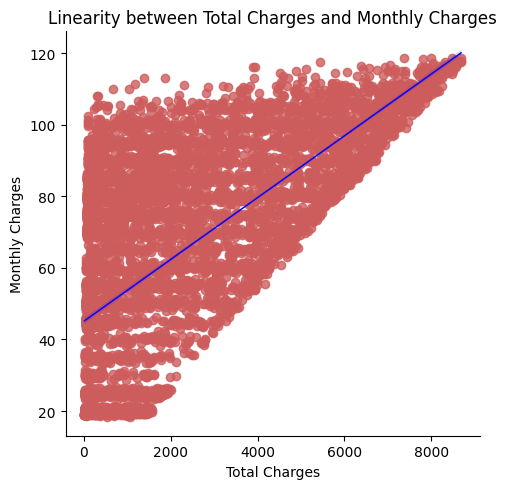

In [24]:
# # lmplot to show linear relationship between TotalCharges and MonthlyCharges
sns.lmplot(
    x='TotalCharges',
    y='MonthlyCharges',
    data=df,
    scatter_kws={'marker': 'o', 'color': 'indianred'},
    line_kws={'linewidth': 1, 'color': 'blue'}
)

plt.title('Linearity between Total Charges and Monthly Charges')
plt.xlabel('Total Charges')
plt.ylabel('Monthly Charges')
plt.tight_layout()
plt.show()

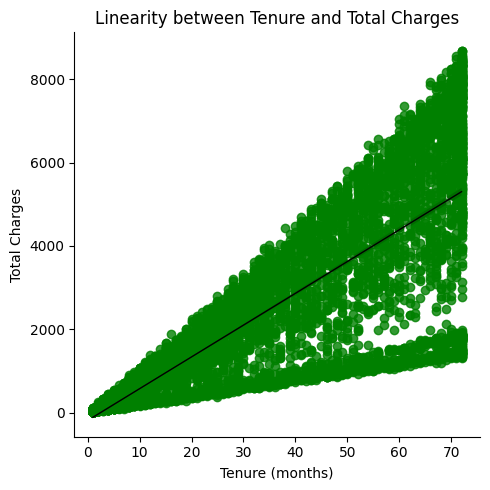

In [25]:
 # lmplot to show linear relationship between TotalCharges and tenure(time-spend)
sns.lmplot(
    x='tenure',
    y='TotalCharges',
    data=df,
    scatter_kws={'marker': 'o', 'color': 'green'},
    line_kws={'linewidth': 1, 'color': 'black'}
)

plt.title('Linearity between Tenure and Total Charges')
plt.xlabel('Tenure (months)')
plt.ylabel('Total Charges')
plt.tight_layout()
plt.show()

Box Plot Analysis for Outliers Check

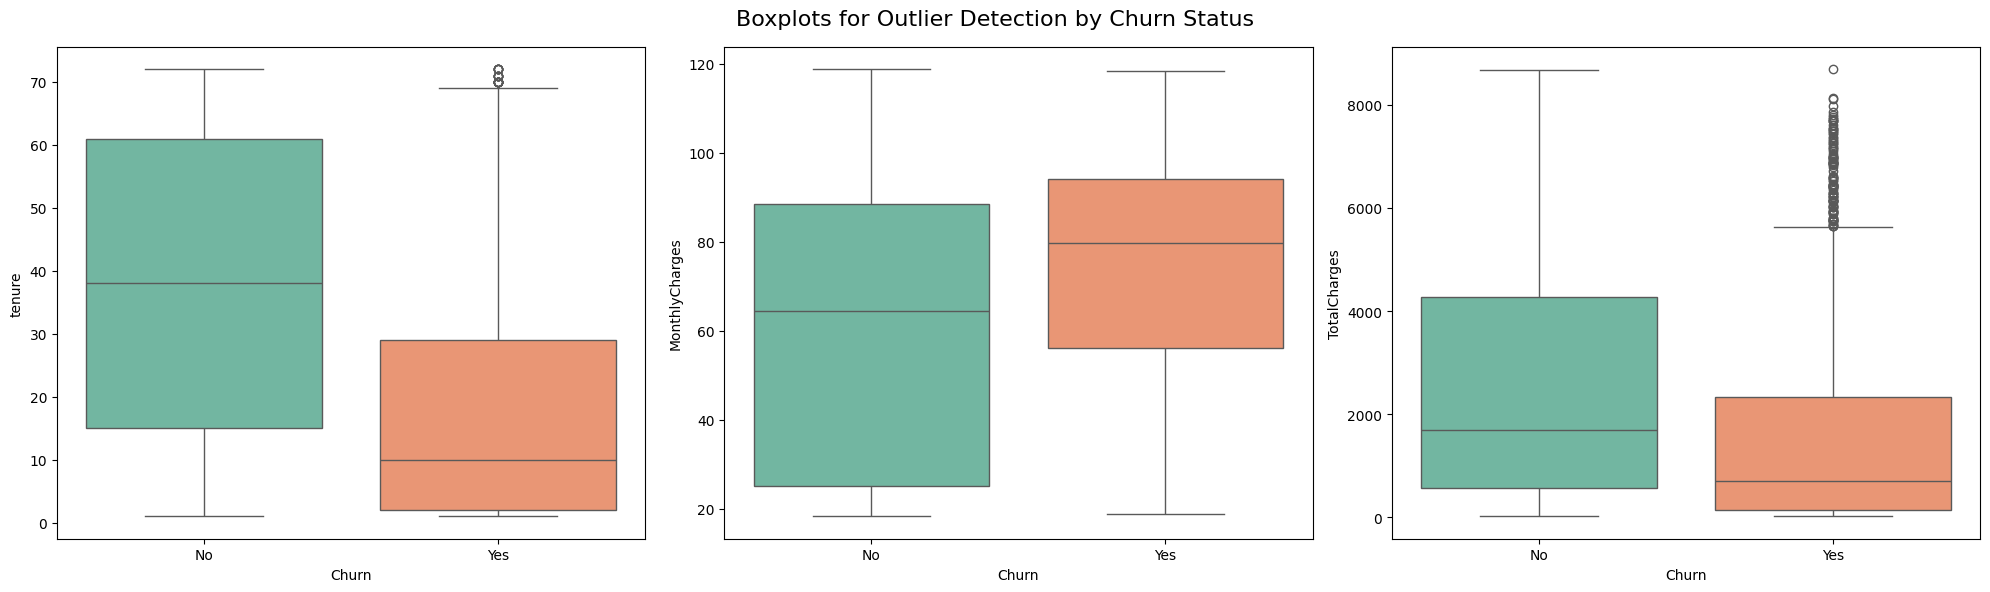

In [26]:
# Clean TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

# Create subplots
f, axes = plt.subplots(1, 3, figsize=(20, 6))

# Tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=df, hue='Churn', palette="Set2", ax=axes[0])

# MonthlyCharges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, hue='Churn', palette="Set2", ax=axes[1])

# TotalCharges vs Churn
sns.boxplot(x='Churn', y='TotalCharges', data=df, hue='Churn', palette="Set2", ax=axes[2])

# Title and layout
f.suptitle('Boxplots for Outlier Detection by Churn Status', fontsize=16)
plt.tight_layout()
plt.show()

Outliers Analysis

In [27]:
# Select only numeric/continuous columns for outlier analysis
cnames = df.columns[(df.dtypes == "float64") | (df.dtypes == "int64")].tolist()

print("Numeric columns suitable for outlier analysis:")
print(cnames)

Numeric columns suitable for outlier analysis:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [28]:
# Work on a copy to avoid altering the original dataframe unless intended
outlier_free_df = df.copy()

for i in cnames:
    print(f"\nColumn: {i}")
    
    # Calculate Q1 and Q3
    Q1 = outlier_free_df[i].quantile(0.25)
    Q3 = outlier_free_df[i].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    
    # Drop outliers
    outlier_free_df = outlier_free_df[(outlier_free_df[i] >= lower_bound) & (outlier_free_df[i] <= upper_bound)]

print(f"\nShape after outlier removal: {outlier_free_df.shape}")



Column: SeniorCitizen
IQR: 0.0
Lower Bound: 0.0
Upper Bound: 0.0

Column: tenure
IQR: 46.0
Lower Bound: -60.0
Upper Bound: 124.0

Column: MonthlyCharges
IQR: 61.18749999999999
Lower Bound: -66.18124999999998
Upper Bound: 178.56874999999997

Column: TotalCharges
IQR: 3200.7875000000004
Lower Bound: -4435.606250000001
Upper Bound: 8367.54375

Shape after outlier removal: (5871, 21)


Lets do box plot analysis as we have droped outliers from our dataset


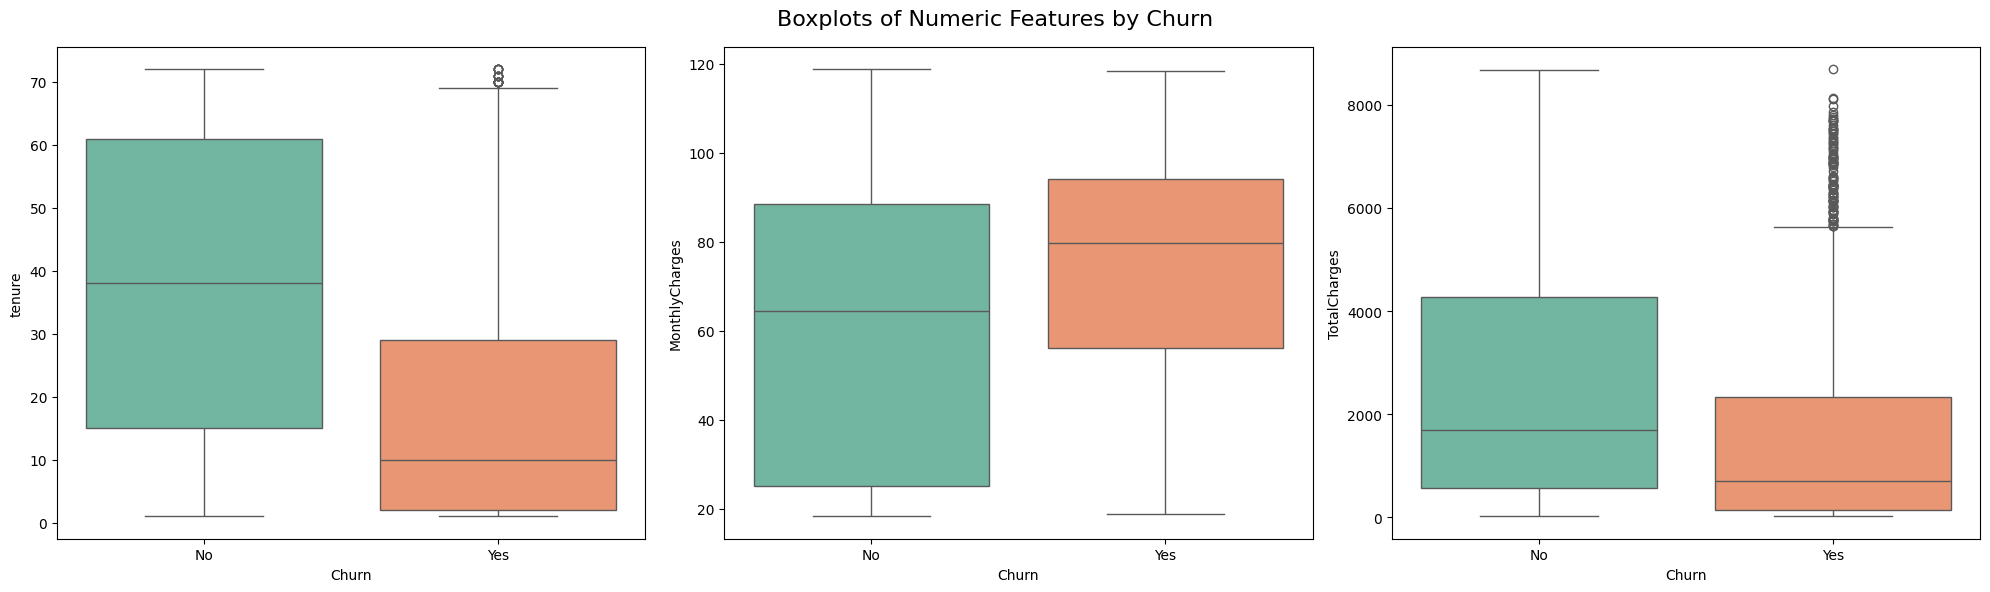

In [29]:

# Ensure TotalCharges is numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

# Create boxplots for numeric columns grouped by 'Churn'
f, axes = plt.subplots(1, 3, figsize=(20, 6))

# Boxplot: tenure
sns.boxplot(x='Churn', y='tenure', data=df, hue='Churn', palette="Set2", ax=axes[0])

# Boxplot: MonthlyCharges
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, hue='Churn', palette="Set2", ax=axes[1])

# Boxplot: TotalCharges
sns.boxplot(x='Churn', y='TotalCharges', data=df, hue='Churn', palette="Set2", ax=axes[2])

# Final layout and title
f.suptitle('Boxplots of Numeric Features by Churn', fontsize=16)
plt.tight_layout()
plt.show()

Now we can see that now most of the outliers have been dropped. Lets Check the dimension of the dataset.

In [30]:
# Lets check the dimension of the data dataset

print("Total No. Observations of the  Dataset", df.shape)

Total No. Observations of the  Dataset (7032, 21)


Feature Selection


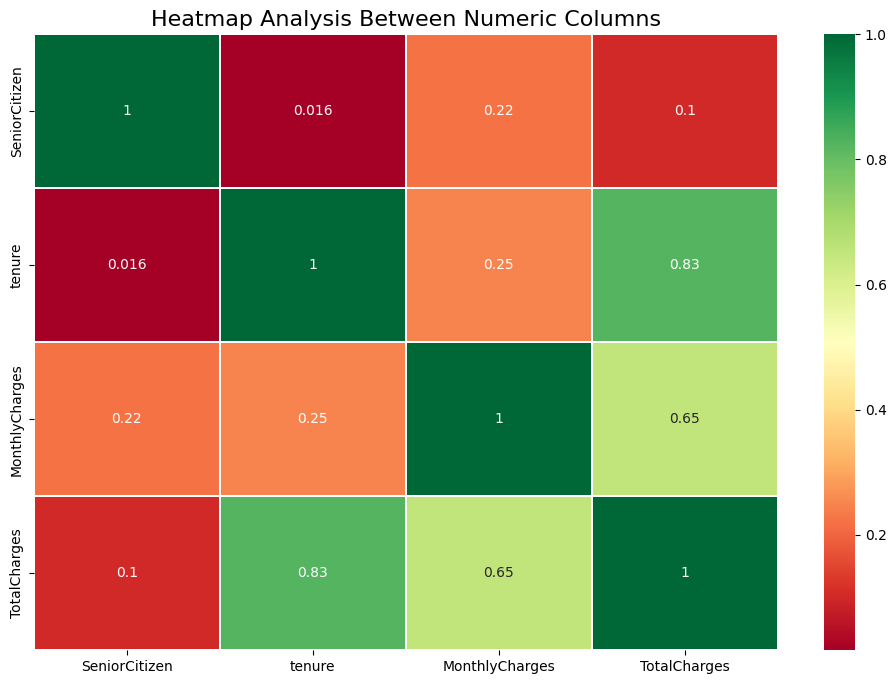

In [31]:
# Select only numeric columns
cnames = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Generate correlation matrix
corr = df[cnames].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths=0.2)
plt.title("Heatmap Analysis Between Numeric Columns", fontsize=16)
plt.show()

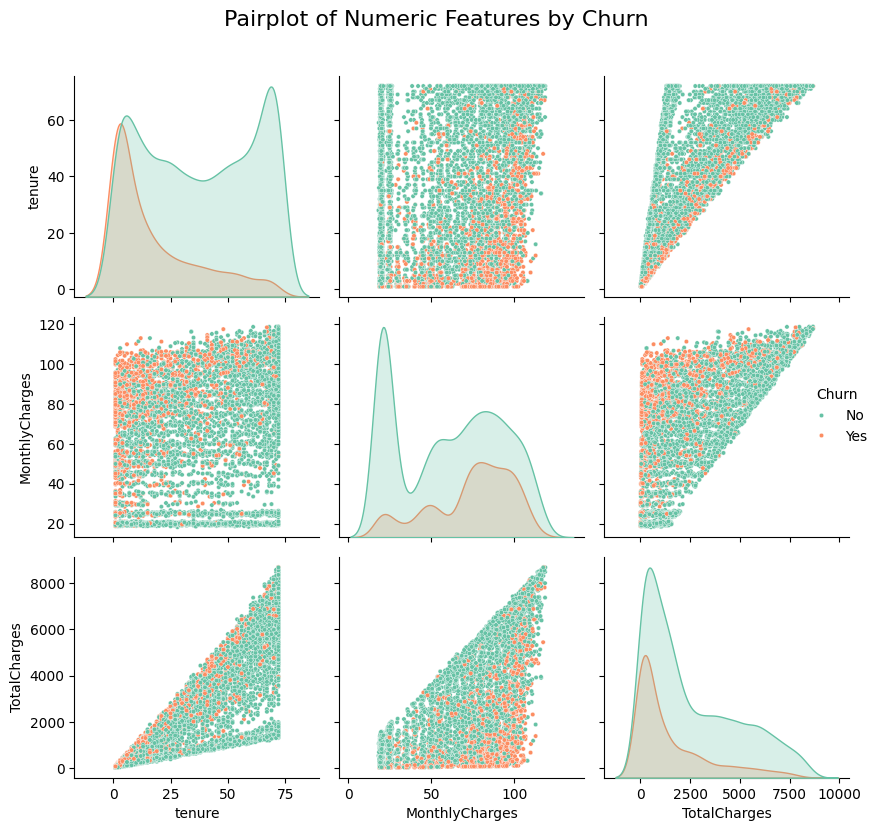

In [32]:
# Select numeric columns for pairplot
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Ensure 'Churn' is categorical for coloring
df['Churn'] = df['Churn'].astype(str)

# Create the pairplot
sns.pairplot(df[numeric_cols], hue='Churn', palette='Set2', height=2.7, 
             diag_kind='kde', diag_kws=dict(shade=True), plot_kws=dict(s=10))

plt.suptitle('Pairplot of Numeric Features by Churn', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

Lets Analyze Chi2-Square test of Independence for categorical variables

In [33]:
print("Chi2-Square Test of Independence")

# Loop for Chi-square test
for col in cat_names:
    print(f"Testing variable: {col}")
    
    # Contingency table
    contingency = pd.crosstab(df['Churn'], df[col])
    
    # Chi-square test
    chi2, p, dof, ex = chi2_contingency(contingency)
    
    # Print result
    print(f"P-value: {p}")

Chi2-Square Test of Independence
Testing variable: customerID
P-value: 0.49439329444279007
Testing variable: gender
P-value: 0.490488470706551
Testing variable: Partner
P-value: 3.97379757451591e-36
Testing variable: Dependents
P-value: 2.0196592017051303e-42
Testing variable: PhoneService
P-value: 0.34992398942431924
Testing variable: MultipleLines
P-value: 0.0035679273999811405
Testing variable: InternetService
P-value: 5.831198962236941e-159
Testing variable: OnlineSecurity
P-value: 1.4006867477839222e-184
Testing variable: OnlineBackup
P-value: 7.776099238804965e-131
Testing variable: DeviceProtection
P-value: 1.9593887862403176e-121
Testing variable: TechSupport
P-value: 7.407807748843288e-180
Testing variable: StreamingTV
P-value: 1.3246411131691968e-81
Testing variable: StreamingMovies
P-value: 5.353560421401323e-82
Testing variable: Contract
P-value: 7.326182186264635e-257
Testing variable: PaperlessBilling
P-value: 8.236203353962564e-58
Testing variable: PaymentMethod
P-value:

Dimension Reduction

In [34]:
cols_to_drop = ['state', 'area code', 'phone number', 
                'total day charge', 'total eve charge', 
                'total night charge', 'total intl charge']

train_data = train_data.drop(columns=cols_to_drop, errors='ignore')
test_data = test_data.drop(columns=cols_to_drop, errors='ignore')

Feature Selection and confirming our final Continuous and Categorical Features

In [35]:
# Recheck numeric columns (int or float)
cnames = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric Columns:")
print(cnames)

print('********************************************************')

# Recheck categorical columns (object or category)
cat_names = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:")
print(cat_names)

Numeric Columns:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
********************************************************
Categorical Columns:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Assigning level to Categorical Column

In [36]:
# Convert object columns to category, then encode
cat_names = train_data.select_dtypes(include='object').columns

for col in cat_names:
    train_data[col] = train_data[col].astype('category').cat.codes
    test_data[col] = test_data[col].astype('category').cat.codes

More Exploration of our data

In [37]:
# Lets apply groupby with contract
contract_counts = train_data.groupby("Contract").size()
contract_counts

Contract
Month-to-month    3083
One year          1212
Two year          1339
dtype: int64

In [38]:
#lets apply groupby with internet service
internet_service_counts = train_data.groupby("InternetService").size()
internet_service_counts

InternetService
DSL            1939
Fiber optic    2481
No             1214
dtype: int64

In [39]:
# lets apply groupby with phone service
phone_service_counts = train_data.groupby("PhoneService").size()
phone_service_counts

PhoneService
No      552
Yes    5082
dtype: int64

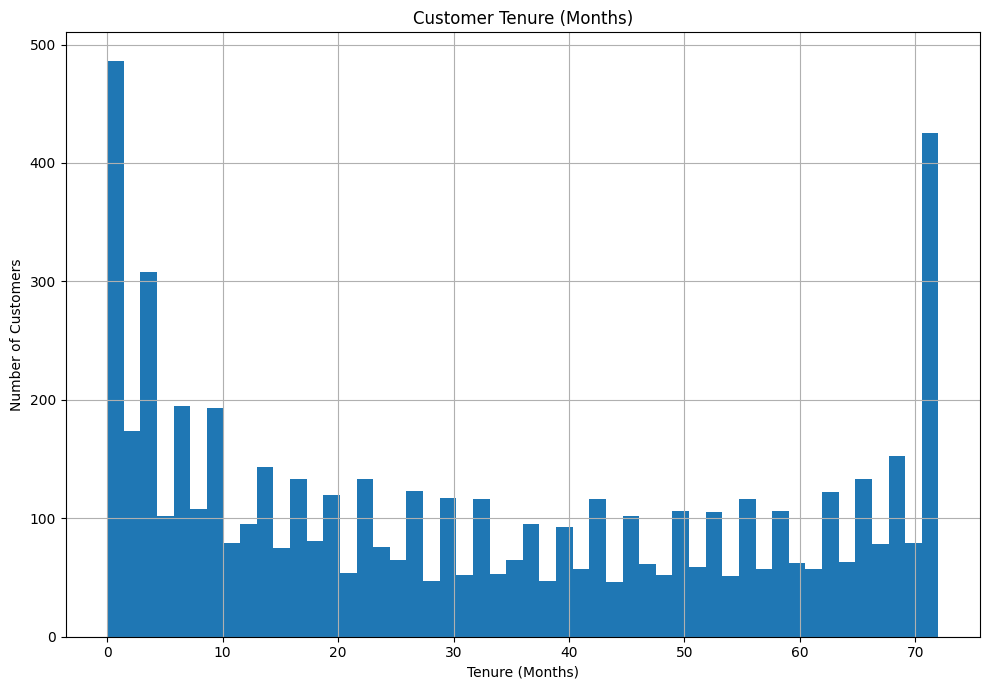

In [40]:
train_data['tenure'].hist(bins=50, figsize=(10,7))
plt.title("Customer Tenure (Months)")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


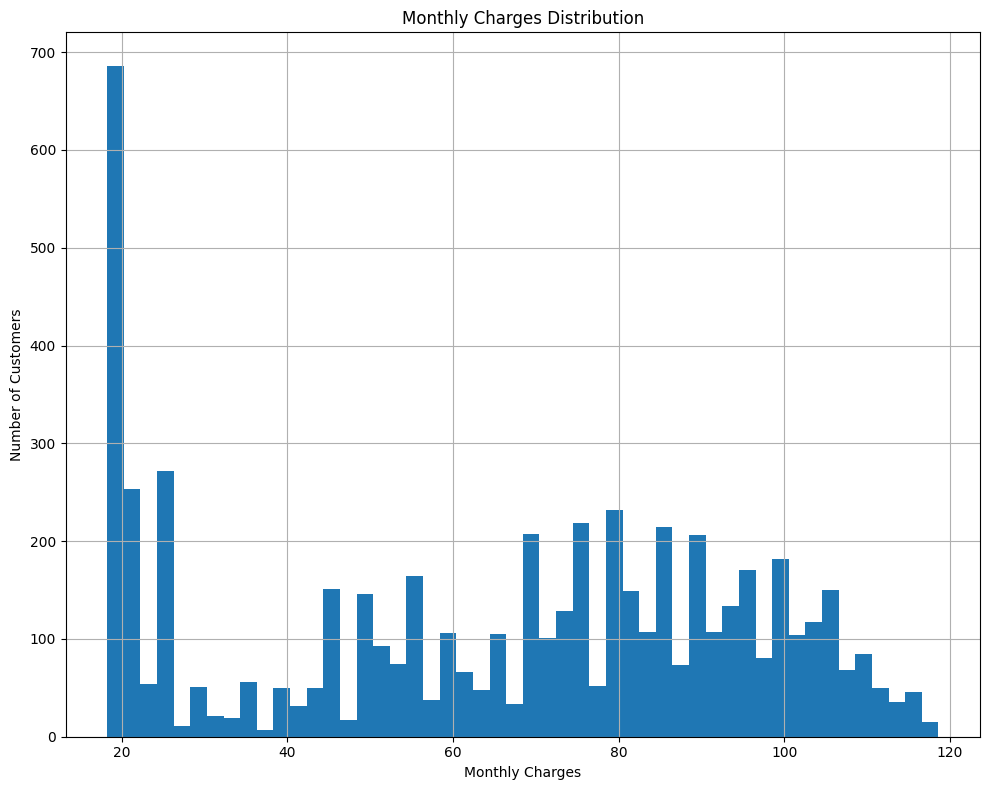

In [41]:
train_data['MonthlyCharges'].hist(bins=50, figsize=(10,8))
plt.title("Monthly Charges Distribution")
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


Checking Distribution of variable/normaity check

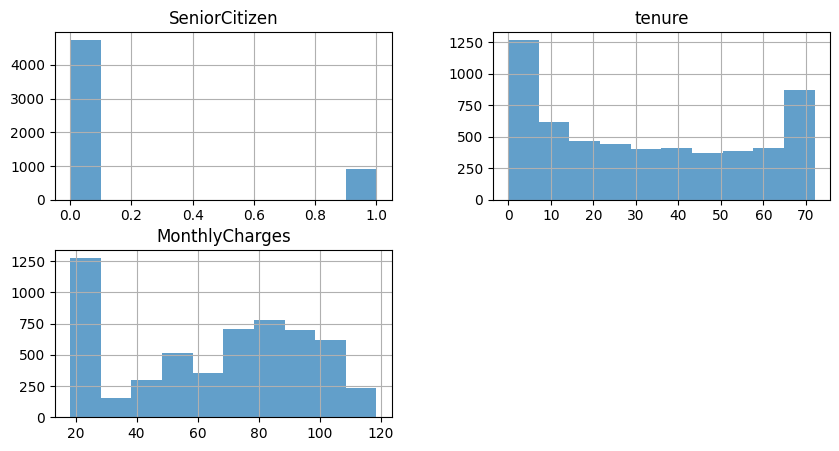

In [42]:
#cnames = ['tenure', 'MonthlyCharges', 'TotalCharges']
train_data[cnames].hist(figsize=(10,5), alpha=0.7)
plt.show()


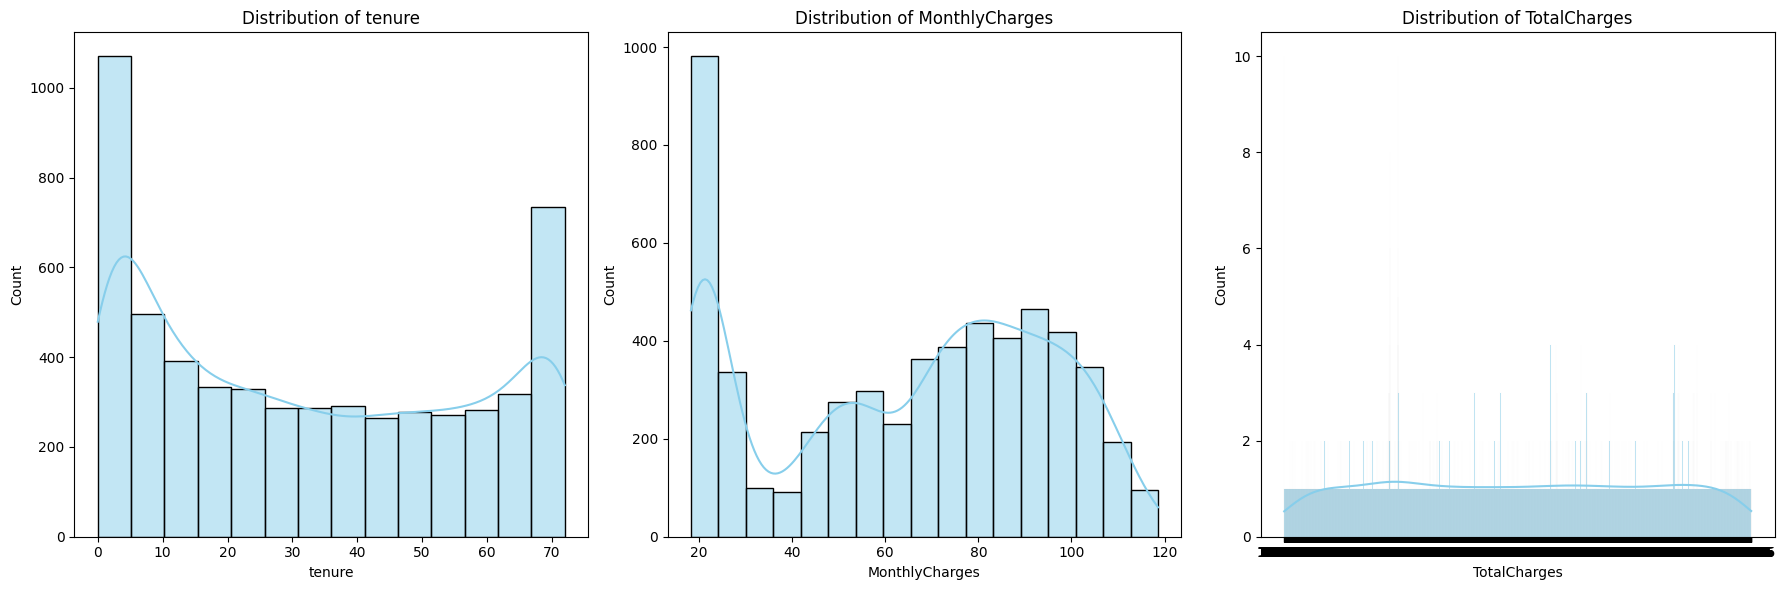

In [43]:
cont_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(18, 6))

for i, col in enumerate(cont_vars):
    plt.subplot(1, 3, i+1)
    sns.histplot(train_data[col], kde=True, bins='auto', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()



Feature Scaling and appling standardization/z.score method


In [44]:
# Convert columns to numeric, coerce errors to NaN
train_data['TotalCharges'] = pd.to_numeric(train_data['TotalCharges'], errors='coerce')
test_data['TotalCharges'] = pd.to_numeric(test_data['TotalCharges'], errors='coerce')


In [45]:
stand_zs = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in stand_zs:
    if pd.api.types.is_numeric_dtype(train_data[col]):
        mean = train_data[col].mean()
        std = train_data[col].std()
        train_data[col] = (train_data[col] - mean) / std
        test_data[col] = (test_data[col] - mean) / std
    else:
        print(f"Column {col} is not numeric and will be skipped.")




In [46]:
# Option 1: Fill NaN with mean (for illustration)
for col in stand_zs:
    train_data[col] = train_data[col].fillna(train_data[col].mean())
    test_data[col] = test_data[col].fillna(train_data[col].mean())


In [47]:
#drop missing values
train_data = train_data.dropna(subset=stand_zs)
test_data = test_data.dropna(subset=stand_zs)


In [48]:
# Splitting the data into Train and Test Sets
X_train = train_data.drop('Churn', axis = 1)
y_train = train_data['Churn']
X_test = test_data.drop('Churn', axis = 1)
y_test = test_data['Churn']


In [49]:
# Lets print out the X_train, y_train, X_test and y_test
print('X_train values------>', X_train.shape)
print('y_train values------>', y_train.shape)
print('X_test values------->', X_test.shape)
print('y_test values------->', y_test.shape)


X_train values------> (5634, 20)
y_train values------> (5634,)
X_test values-------> (1409, 20)
y_test values-------> (1409,)


In [50]:
# As we can see there is target class imbalance problem, training values before applying Smote 
y_train.value_counts()

Churn
No     4138
Yes    1496
Name: count, dtype: int64

SMOTE (Synthetic Minority Over-Sampling Technique)
we do synthetic data only on the train: SMOTE creates synthetic observations of the minority class (churn) by:

Finding the k-nearest-neighbors for minority class observations (finding similar observations) Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observation.

we use smote only on the training data set

In [51]:
# Drop customerID and target
X_train = train_data.drop(['customerID', 'Churn'], axis=1)
y_train = train_data['Churn'].map({'Yes': 1, 'No': 0})

# One-hot encode categorical features
X_train = pd.get_dummies(X_train)

# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


Model development


In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

def predct_func(classification_models, features, comparison):
    '''
    Fits the classification model, performs prediction on X_test,
    prints classification report, confusion matrix and cross-validation score.
    
    Parameters:
    - classification_models: Classifier (e.g., RandomForestClassifier)
    - features: X_train data (independent variables)
    - comparison: y_train data (target variable)
    
    Assumes:
    - X_test and y_test are already defined in global scope
    '''
    # Fit the model on training data
    classification_models.fit(features, comparison)
    
    # Predict on test data
    predicted_vals = classification_models.predict(X_test)
    
    # Perform 10-fold cross-validation
    try:
        KVC = cross_val_score(estimator=classification_models, X=features, y=comparison, cv=10)
        KFoldCross_Accuracies = KVC.mean()
        print('K-Fold Cross-Validation Accuracy:', KFoldCross_Accuracies)
    except Exception as e:
        print("K-Fold validation failed:", e)
    
    print("\n************ Classification Report ************\n")
    print(classification_report(y_test, predicted_vals))

    print("************ Confusion Matrix *****************\n")
    print(confusion_matrix(y_test, predicted_vals))


In [53]:
def eval_model(actual_vals, prediction_vals):
    '''
    Evaluates a classification model using:
    - Confusion Matrix
    - False Negative Rate
    - False Positive Rate
    - Sensitivity / Recall / True Positive Rate
    - Specificity / True Negative Rate
    '''
    CM = pd.crosstab(actual_vals, prediction_vals, rownames=['Actual'], colnames=['Predicted'])

    print("\n<--------------- ERROR METRICS --------------->\n")
    print("Confusion Matrix:\n", CM)
    
    try:
        TN = CM.iloc[0, 0] if (0, 0) in CM.index else 0
        FP = CM.iloc[0, 1] if (0, 1) in CM.index else 0
        FN = CM.iloc[1, 0] if (1, 0) in CM.index else 0
        TP = CM.iloc[1, 1] if (1, 1) in CM.index else 0

        # Calculating metrics with safe checks
        FNR = (FN / (FN + TP)) * 100 if (FN + TP) > 0 else 0
        FPR = (FP / (FP + TN)) * 100 if (FP + TN) > 0 else 0
        TPR = (TP / (TP + FN)) * 100 if (TP + FN) > 0 else 0
        TNR = (TN / (TN + FP)) * 100 if (TN + FP) > 0 else 0

        print(f"False Negative Rate (FNR) --------> {FNR:.2f}%")
        print(f"False Positive Rate (FPR) --------> {FPR:.2f}%")
        print(f"Sensitivity / Recall (TPR) -------> {TPR:.2f}%")
        print(f"Specificity / TNR ----------------> {TNR:.2f}%")

    except Exception as e:
        print("Error computing error metrics:", e)

In [54]:
# Drop 'customerID' and encode categorical variables
X = train_data.drop(['customerID', 'Churn'], axis=1)
y = train_data['Churn'].map({'Yes': 1, 'No': 0})

# One-hot encode categorical features
X = pd.get_dummies(X)

# SMOTE for balancing
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X, y)


In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def predct_func(model, X_train, y_train):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred))
    print("\nClassification Report:\n", classification_report(y_train, y_pred))
    print("\nAccuracy:", accuracy_score(y_train, y_pred))


In [56]:
from sklearn.tree import DecisionTreeClassifier

DT_Model = DecisionTreeClassifier(criterion='entropy', random_state=100)
predct_func(DT_Model, X_train_balanced, y_train_balanced)


Confusion Matrix:
 [[4136    2]
 [   6 4132]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      4138

    accuracy                           1.00      8276
   macro avg       1.00      1.00      1.00      8276
weighted avg       1.00      1.00      1.00      8276


Accuracy: 0.9990333494441759


In [57]:
# Lets predict new test cases
# Prepare test data
X_test = test_data.drop(['customerID', 'Churn'], axis=1)
X_test['TotalCharges'] = pd.to_numeric(X_test['TotalCharges'], errors='coerce')
X_test['TotalCharges'] = X_test['TotalCharges'].fillna(train_data['TotalCharges'].mean())

# One-hot encode and align columns
X_train_encoded = pd.get_dummies(train_data.drop(['customerID', 'Churn'], axis=1))
X_test = pd.get_dummies(X_test)
X_test = X_test.reindex(columns=X_train_encoded.columns, fill_value=0)

# Standardize
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    mean = train_data[col].mean()
    std = train_data[col].std()
    X_test[col] = (X_test[col] - mean) / std

# Predict
DT_Predictions = DT_Model.predict(X_test)


In [58]:
y_test = test_data['Churn'].map({'Yes': 1, 'No': 0})
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

def eval_model(y_true, y_pred):
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=['No Churn', 'Churn']))
    print("Accuracy: {:.4f}".format(accuracy_score(y_true, y_pred)))
    print("Precision: {:.4f}".format(precision_score(y_true, y_pred)))
    print("Recall: {:.4f}".format(recall_score(y_true, y_pred)))
    print("F1 Score: {:.4f}".format(f1_score(y_true, y_pred)))
    try:
        print("ROC AUC: {:.4f}".format(roc_auc_score(y_true, y_pred)))
    except:
        print("ROC AUC: Not available (only one class present in predictions)")


In [59]:
eval_model(y_test, DT_Predictions)


Confusion Matrix:
 [[824 212]
 [166 207]]

Classification Report:
               precision    recall  f1-score   support

    No Churn       0.83      0.80      0.81      1036
       Churn       0.49      0.55      0.52       373

    accuracy                           0.73      1409
   macro avg       0.66      0.68      0.67      1409
weighted avg       0.74      0.73      0.74      1409

Accuracy: 0.7317
Precision: 0.4940
Recall: 0.5550
F1 Score: 0.5227
ROC AUC: 0.6752


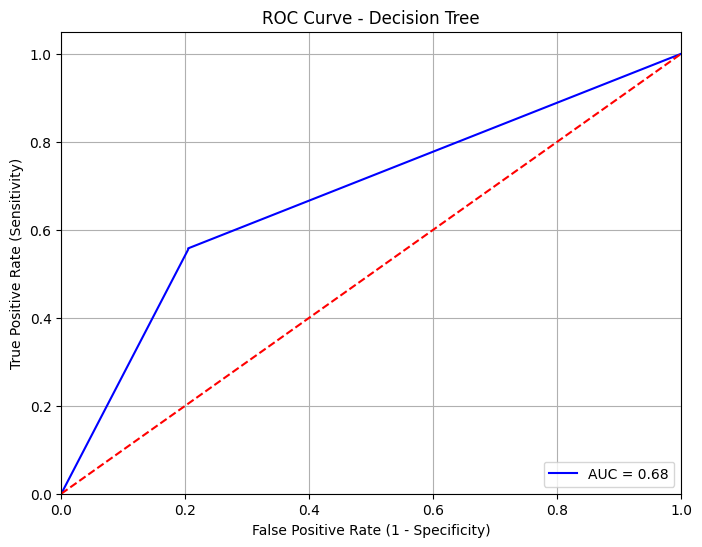

In [60]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ensure y_test is binary (0/1)
if y_test.dtype == 'object':
    y_test = y_test.map({'No': 0, 'Yes': 1})

# Predict probabilities for the positive class (Churn = 1)
y_proba = DT_Model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds_DT = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



In [61]:
# Lets Develop Random Forest Model
RF_Model = RandomForestClassifier(n_estimators=20, criterion='entropy', random_state=100)
predct_func(RF_Model, X_train_balanced, y_train_balanced)

Confusion Matrix:
 [[4129    9]
 [  15 4123]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      4138

    accuracy                           1.00      8276
   macro avg       1.00      1.00      1.00      8276
weighted avg       1.00      1.00      1.00      8276


Accuracy: 0.9971000483325277


In [62]:
# Lets Predict new test cases
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def predct_func(model, X_train, y_train):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred))
    print("\nClassification Report:\n", classification_report(y_train, y_pred, target_names=['No Churn', 'Churn']))
    print("Accuracy: {:.4f}".format(accuracy_score(y_train, y_pred)))


In [63]:
# Drop customerID and Churn
X_test = test_data.drop(['customerID', 'Churn'], axis=1)

# Convert TotalCharges to numeric, fill missing
X_test['TotalCharges'] = pd.to_numeric(X_test['TotalCharges'], errors='coerce')
X_test['TotalCharges'] = X_test['TotalCharges'].fillna(train_data['TotalCharges'].mean())

# One-hot encode and align columns with train
X_test = pd.get_dummies(X_test)
X_test = X_test.reindex(columns=X_train_balanced.columns, fill_value=0)

# Standardize if you did for train
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    mean = train_data[col].mean()
    std = train_data[col].std()
    X_test[col] = (X_test[col] - mean) / std

# Predict
RF_Predictions = RF_Model.predict(X_test)


In [64]:
y_test = test_data['Churn'].map({'Yes': 1, 'No': 0})
eval_model(y_test, RF_Predictions)
y_test = test_data['Churn'].map({'Yes': 1, 'No': 0})
eval_model(y_test, RF_Predictions)


Confusion Matrix:
 [[888 148]
 [154 219]]

Classification Report:
               precision    recall  f1-score   support

    No Churn       0.85      0.86      0.85      1036
       Churn       0.60      0.59      0.59       373

    accuracy                           0.79      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.79      0.79      1409

Accuracy: 0.7857
Precision: 0.5967
Recall: 0.5871
F1 Score: 0.5919
ROC AUC: 0.7221
Confusion Matrix:
 [[888 148]
 [154 219]]

Classification Report:
               precision    recall  f1-score   support

    No Churn       0.85      0.86      0.85      1036
       Churn       0.60      0.59      0.59       373

    accuracy                           0.79      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.79      0.79      1409

Accuracy: 0.7857
Precision: 0.5967
Recall: 0.5871
F1 Score: 0.5919
ROC AUC: 0.7221


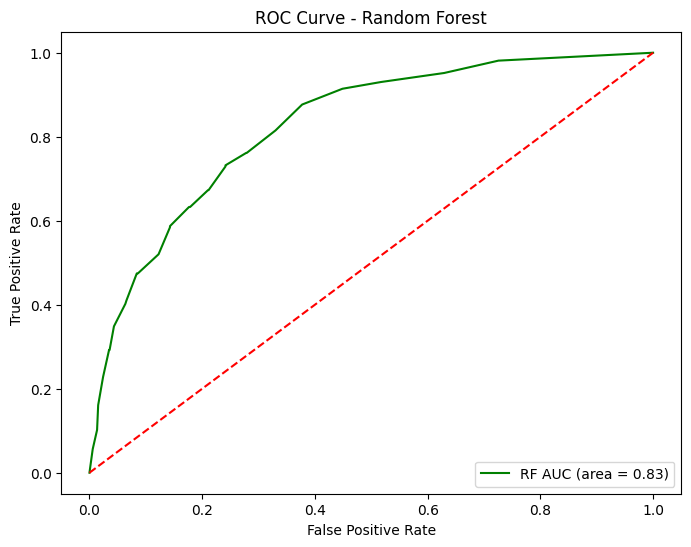

In [65]:
#ROC curve for random forest
from sklearn.metrics import roc_curve, auc
y_proba_rf = RF_Model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds_rf = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='green', label='RF AUC (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


In [66]:
# Lets Develop Logistic Regression Model
LR_Model = LogisticRegression()
predct_func(LR_Model, X_train_balanced, y_train_balanced)

Confusion Matrix:
 [[3488  650]
 [ 647 3491]]

Classification Report:
               precision    recall  f1-score   support

    No Churn       0.84      0.84      0.84      4138
       Churn       0.84      0.84      0.84      4138

    accuracy                           0.84      8276
   macro avg       0.84      0.84      0.84      8276
weighted avg       0.84      0.84      0.84      8276

Accuracy: 0.8433


In [67]:
# Lets Predict New Test Cases
LR_Predictions = LR_Model.predict(X_test)

In [68]:
# Now lets evaluate Error Metrics For Logistic Regression Model
eval_model(y_test, LR_Predictions)

Confusion Matrix:
 [[872 164]
 [115 258]]

Classification Report:
               precision    recall  f1-score   support

    No Churn       0.88      0.84      0.86      1036
       Churn       0.61      0.69      0.65       373

    accuracy                           0.80      1409
   macro avg       0.75      0.77      0.76      1409
weighted avg       0.81      0.80      0.81      1409

Accuracy: 0.8020
Precision: 0.6114
Recall: 0.6917
F1 Score: 0.6491
ROC AUC: 0.7667


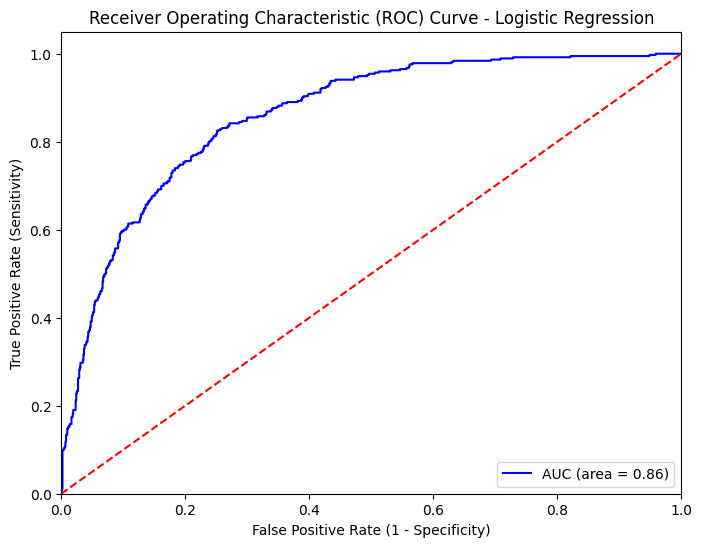

In [69]:
# Get predicted probabilities for the positive class
y_proba = LR_Model.predict_proba(X_test)[:, 1]  # Use your fitted Logistic Regression model

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='AUC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()


In [70]:
# Lets Develop KNN Model Now
KNN_Model = KNeighborsClassifier(n_neighbors=5)
predct_func(KNN_Model, X_train_balanced, y_train_balanced)

Confusion Matrix:
 [[3444  694]
 [ 155 3983]]

Classification Report:
               precision    recall  f1-score   support

    No Churn       0.96      0.83      0.89      4138
       Churn       0.85      0.96      0.90      4138

    accuracy                           0.90      8276
   macro avg       0.90      0.90      0.90      8276
weighted avg       0.90      0.90      0.90      8276

Accuracy: 0.8974


In [71]:
# Lets Predict New Test Cases
KNN_Predictions = KNN_Model.predict(X_test)


In [72]:
# Now lets evaluate Error Metrics For K-Nearest-Neighbor Model
eval_model(y_test, KNN_Predictions)

Confusion Matrix:
 [[789 247]
 [116 257]]

Classification Report:
               precision    recall  f1-score   support

    No Churn       0.87      0.76      0.81      1036
       Churn       0.51      0.69      0.59       373

    accuracy                           0.74      1409
   macro avg       0.69      0.73      0.70      1409
weighted avg       0.78      0.74      0.75      1409

Accuracy: 0.7424
Precision: 0.5099
Recall: 0.6890
F1 Score: 0.5861
ROC AUC: 0.7253


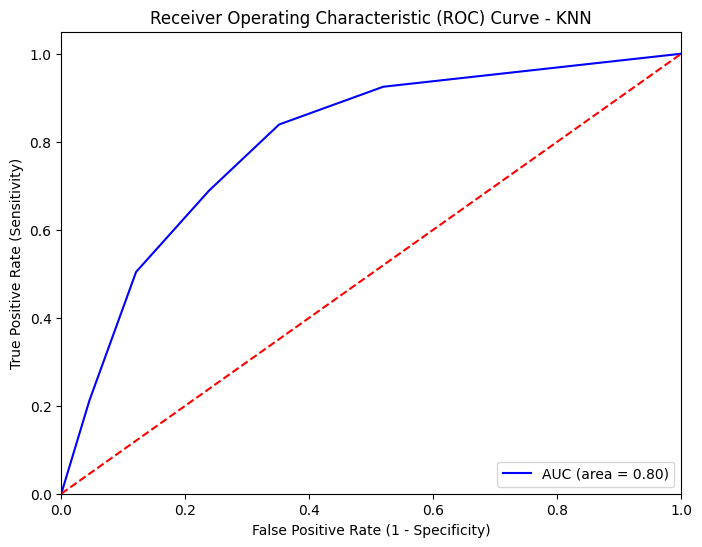

In [73]:
y_proba_knn = KNN_Model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds_knn = roc_curve(y_test, y_proba_knn)
roc_auc_knn = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='AUC (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc='lower right')
plt.show()

In [74]:
# Lets Develop Naive Bayes Model
NB_Model  = GaussianNB()
predct_func(NB_Model, X_train_balanced, y_train_balanced)

Confusion Matrix:
 [[2616 1522]
 [ 596 3542]]

Classification Report:
               precision    recall  f1-score   support

    No Churn       0.81      0.63      0.71      4138
       Churn       0.70      0.86      0.77      4138

    accuracy                           0.74      8276
   macro avg       0.76      0.74      0.74      8276
weighted avg       0.76      0.74      0.74      8276

Accuracy: 0.7441


In [75]:
# Lets Predict new test cases
NB_Predictions = NB_Model.predict(X_test)

In [76]:
# Now lets evaluate Error Metrics For Naive Bayes Model
eval_model(y_test, NB_Predictions)


Confusion Matrix:
 [[654 382]
 [ 51 322]]

Classification Report:
               precision    recall  f1-score   support

    No Churn       0.93      0.63      0.75      1036
       Churn       0.46      0.86      0.60       373

    accuracy                           0.69      1409
   macro avg       0.69      0.75      0.67      1409
weighted avg       0.80      0.69      0.71      1409

Accuracy: 0.6927
Precision: 0.4574
Recall: 0.8633
F1 Score: 0.5980
ROC AUC: 0.7473


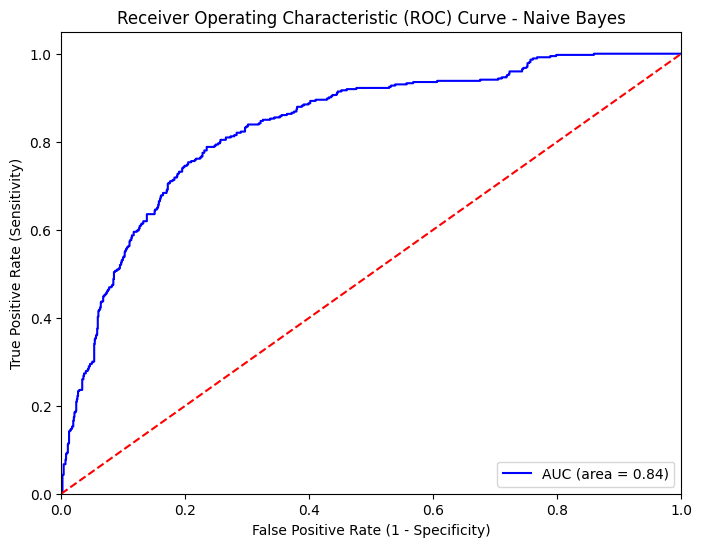

In [77]:
# Get predicted probabilities for the positive class (Churn = 1)
y_proba_nb = NB_Model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds_nb = roc_curve(y_test, y_proba_nb)
roc_auc_nb = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='AUC (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.show()


Hyperparameter tuning using GridSearchCV
~We will use GridSearchCV for tuning the parameters any two algorithms, to achieve optimum performance.

~ Here i am going for Decision Tree & Random Forest Model for Tuning as both have performed well but out of these two Random forest is doing well.

~ We will be running the Hyper-Parameter Code for only once and save the results of our Final Model based Results for Decision Tree and Random Forest we will finalize our final model which is having optimum performance after hyper parameter tuning. and here i am commenting the below code as it will take lot of time for execution.



In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid with realistic ranges
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9, 11, 13, 15],  # Focus on shallower trees
    'min_samples_split': [2, 5, 10, 15]     # Prevent overfitting
}

# Initialize GridSearchCV with recall scoring
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=100),
    param_grid=param_grid,
    scoring='recall',
    cv=5,                # Reduced from 10 to 5 for efficiency
    n_jobs=-1
)

# Fit on SMOTE-balanced training data
grid_search.fit(X_train_balanced, y_train_balanced)

# Get best parameters and score
print("Best Recall:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)


Best Recall: 0.8346944020935926
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


In [86]:
best_params = {'criterion': 'gini', 'max_depth': 100}
from sklearn.tree import DecisionTreeClassifier

# Use the best parameters found
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=100, random_state=100)
dt_model.fit(X_train_balanced, y_train_balanced)
predct_func(dt_model, X_train_balanced, y_train_balanced)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def predct_func(model, X, y):
    y_pred = model.predict(X)
    print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
    print("\nClassification Report:\n", classification_report(y, y_pred))
    print("Accuracy: {:.4f}".format(accuracy_score(y, y_pred)))


Confusion Matrix:
 [[4136    2]
 [   6 4132]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      4138

    accuracy                           1.00      8276
   macro avg       1.00      1.00      1.00      8276
weighted avg       1.00      1.00      1.00      8276

Accuracy: 0.9990


In [84]:
# Preprocess test data (drop customerID, encode, standardize, align columns)
X_test = test_data.drop(['customerID', 'Churn'], axis=1)
X_test = pd.get_dummies(X_test)
X_test = X_test.reindex(columns=X_train_balanced.columns, fill_value=0)
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    mean = train_data[col].mean()
    std = train_data[col].std()
    X_test[col] = (X_test[col] - mean) / std

# Predict
dt_predictions = dt_model.predict(X_test)


In [85]:
y_test = test_data['Churn'].map({'Yes': 1, 'No': 0})
eval_model(y_test, dt_predictions)

Confusion Matrix:
 [[803 233]
 [179 194]]

Classification Report:
               precision    recall  f1-score   support

    No Churn       0.82      0.78      0.80      1036
       Churn       0.45      0.52      0.48       373

    accuracy                           0.71      1409
   macro avg       0.64      0.65      0.64      1409
weighted avg       0.72      0.71      0.71      1409

Accuracy: 0.7076
Precision: 0.4543
Recall: 0.5201
F1 Score: 0.4850
ROC AUC: 0.6476


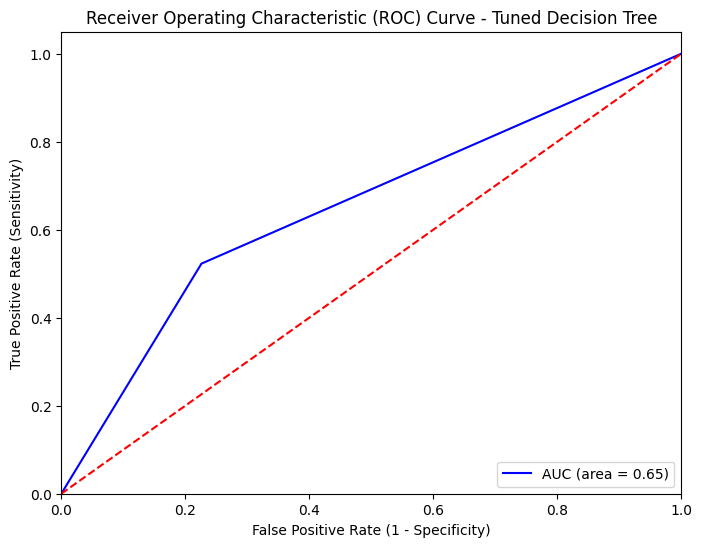

In [87]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Get predicted probabilities for the positive class (Churn=1)
dt_probs = dt_model.predict_proba(X_test)[:, 1]  # dt_model is your tuned DecisionTreeClassifier

# 2. Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, dt_probs)
roc_auc = auc(fpr, tpr)

# 3. Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='AUC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Tuned Decision Tree')
plt.legend(loc='lower right')
plt.show()


In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define a practical parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier(random_state=100)

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='recall',  # Focus on recall for churn detection
    cv=5,              # 5-fold cross-validation for efficiency
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_balanced, y_train_balanced)
print("Best Recall Score: ", grid_search.best_score_)
print("Best Parameters: ", grid_search.best_params_)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Recall Score:  0.8883456296841501
Best Parameters:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [91]:
best_rf = RandomForestClassifier(
    **grid_search.best_params_,
    random_state=100
)
best_rf.fit(X_train_balanced, y_train_balanced)
y_test = test_data['Churn'].map({'Yes': 1, 'No': 0})
rf_predictions = best_rf.predict(X_test)

eval_model(y_test, rf_predictions)  # Use your previously defined eval_model function


Confusion Matrix:
 [[883 153]
 [140 233]]

Classification Report:
               precision    recall  f1-score   support

    No Churn       0.86      0.85      0.86      1036
       Churn       0.60      0.62      0.61       373

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.74      1409
weighted avg       0.79      0.79      0.79      1409

Accuracy: 0.7921
Precision: 0.6036
Recall: 0.6247
F1 Score: 0.6140
ROC AUC: 0.7385


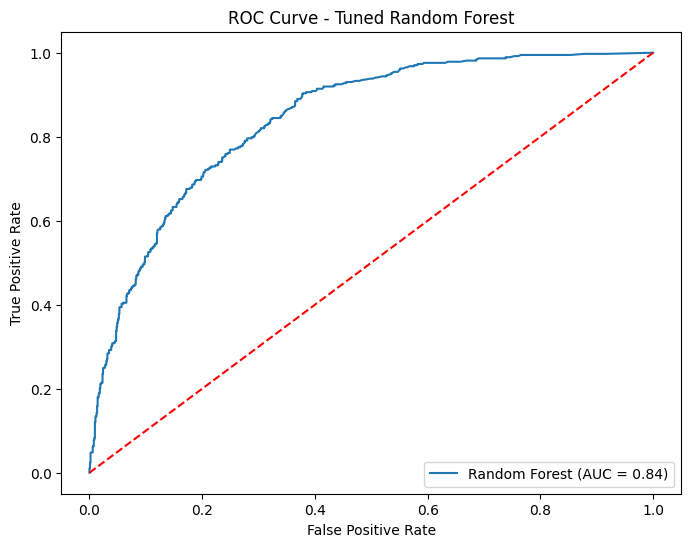

In [92]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

rf_probs = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Random Forest')
plt.legend(loc='lower right')
plt.show()


~ So here we Conclude that Our FINAL MODEL IS TUNED RANDOM FOREST MODEL and it is giving best results with optimum performance when compared with other models.

Feature Importances
lets see which features/predictors carry much information to explain out Target Variable

In [94]:
from sklearn.ensemble import RandomForestClassifier

# Example: X_train_balanced and y_train_balanced are your preprocessed, SMOTE-balanced data
rf_model = RandomForestClassifier(
    n_estimators=100, criterion='entropy', max_depth=50, random_state=100
)
rf_model.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier(criterion='entropy', max_depth=50, random_state=100)

,importance,labels
3,0.127042,TotalCharges
1,0.126264,tenure
2,0.119361,MonthlyCharges
36,0.068585,Contract_Month-to-month
18,0.042399,OnlineSecurity_No


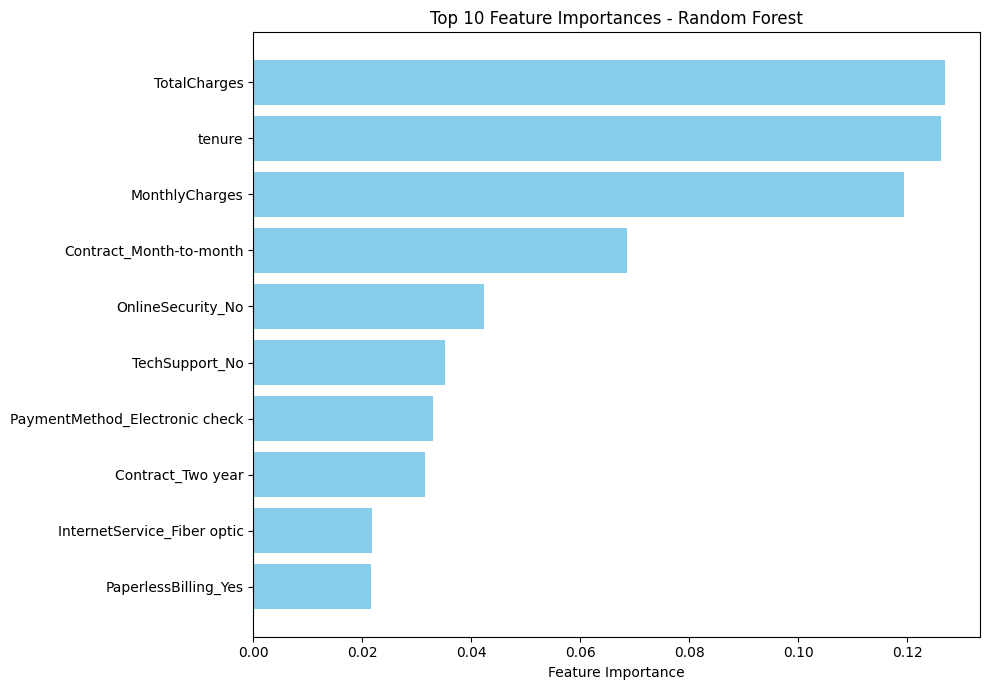

In [95]:
# Feature names from your training data after encoding
features = X_train_balanced.columns

# Create a DataFrame for importances
FI = pd.DataFrame({
    "importance": rf_model.feature_importances_,
    "labels": features
})

FI.sort_values("importance", inplace=True, ascending=False)

# Display top 5 features
display(FI.head(5))

# Plot
plt.figure(figsize=(10, 7))
plt.barh(FI["labels"].head(10)[::-1], FI["importance"].head(10)[::-1], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()



In [ ]:
#Prepare the final dataset for submission
train_data.to_csv("train_df_final_data.csv", index=False)
test_data.to_csv("test_df_final_data.csv", index=False)
